In [1]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

train_dataset = datasets.MNIST(
    root="./mnist", train=True, transform=transforms.ToTensor(), download=True
)

test_dataset = datasets.MNIST(
    root="./mnist", train=False, transform=transforms.ToTensor()
)

32.4%

100.0%


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


100.0%
6.0%


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100.0%
100.0%


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [2]:

import torch
from torch.utils.data.dataset import random_split

torch.manual_seed(1)
train_dataset, val_dataset = random_split(train_dataset, lengths=[55000, 5000])

In [3]:
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True,
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=64,
    shuffle=False,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False,
)

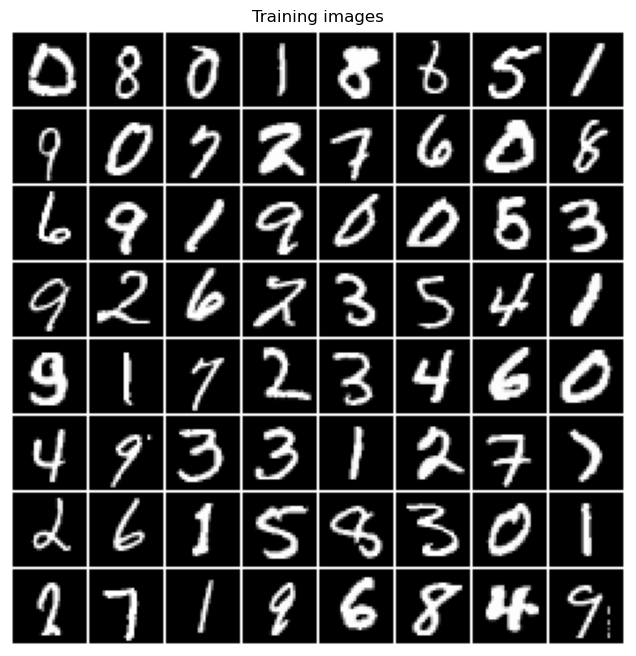

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torchvision


for images, labels in train_loader:  
    break

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64], 
    padding=1,
    pad_value=1.0,
    normalize=True),
    (1, 2, 0)))
plt.show()

In [6]:
images.shape

torch.Size([64, 1, 28, 28])

In [7]:
import torch

torch.flatten(images, start_dim=1).shape

torch.Size([64, 784])

In [12]:
import torch
import torch.nn.functional as F
import torch.nn as nn

class PytorchMLP(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()
        self.linear_1 = torch.nn.Linear(num_features, 25)    
        self.linear_2 = torch.nn.Linear(25, 15)
        self.linear_3 = torch.nn.Linear(15, num_classes)
    
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.linear_1(x)
        x = F.relu(x)
        x= self.linear_2(x)
        x = F.relu(x)
        x = self.linear_3(x)
        return x

In [13]:
def compute_accuracy(model, dataloader):

    model = model.eval()

    correct = 0.0
    total_examples = 0

    for idx, (features, labels) in enumerate(dataloader):

        with torch.inference_mode():
            logits = model(features)

        predictions = torch.argmax(logits, dim=1)

        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    return correct / total_examples

In [14]:
import torch.nn.functional as F

torch.manual_seed(1)
model = PytorchMLP(num_features=784, num_classes=10)

optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

num_epochs = 10

loss_list = []
train_acc_list, val_acc_list = [], []
for epoch in range(num_epochs):

    model = model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):

        logits = model(features)

        loss = F.cross_entropy(logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if not batch_idx % 250:
            ### LOGGING
            print(
                f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
                f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
                f" | Train Loss: {loss:.2f}"
            )
        loss_list.append(loss.item())

    train_acc = compute_accuracy(model, train_loader)
    val_acc = compute_accuracy(model, val_loader)
    print(f"Train Acc {train_acc*100:.2f}% | Val Acc {val_acc*100:.2f}%")
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

Epoch: 001/010 | Batch 000/860 | Train Loss: 2.34
Epoch: 001/010 | Batch 250/860 | Train Loss: 0.84
Epoch: 001/010 | Batch 500/860 | Train Loss: 0.53
Epoch: 001/010 | Batch 750/860 | Train Loss: 0.68
Train Acc 87.97% | Val Acc 87.64%
Epoch: 002/010 | Batch 000/860 | Train Loss: 0.54
Epoch: 002/010 | Batch 250/860 | Train Loss: 0.31
Epoch: 002/010 | Batch 500/860 | Train Loss: 0.22
Epoch: 002/010 | Batch 750/860 | Train Loss: 0.27
Train Acc 91.31% | Val Acc 91.08%
Epoch: 003/010 | Batch 000/860 | Train Loss: 0.44
Epoch: 003/010 | Batch 250/860 | Train Loss: 0.32
Epoch: 003/010 | Batch 500/860 | Train Loss: 0.25
Epoch: 003/010 | Batch 750/860 | Train Loss: 0.18
Train Acc 91.28% | Val Acc 90.38%
Epoch: 004/010 | Batch 000/860 | Train Loss: 0.27
Epoch: 004/010 | Batch 250/860 | Train Loss: 0.24
Epoch: 004/010 | Batch 500/860 | Train Loss: 0.29
Epoch: 004/010 | Batch 750/860 | Train Loss: 0.20
Train Acc 93.49% | Val Acc 92.64%
Epoch: 005/010 | Batch 000/860 | Train Loss: 0.33
Epoch: 005/010